# Data Pre - Proccessing

In [95]:
import pandas as pd
data = pd.read_csv("Electricity Demand Forecast.csv")

In [2]:
data

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,01-01-2015,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,02-01-2015,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0.0,N,N
2,03-01-2015,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,04-01-2015,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,05-01-2015,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,02-10-2020,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,03-10-2020,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,04-10-2020,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,05-10-2020,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


In [3]:
data.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [5]:
data.shape

(2106, 14)

In [6]:
data["solar_exposure"].unique()

array([23.6, 26.8, 26.5, 25.2, 30.7, 31.6, 20.7, 13.5,  3.1,  5.6, 29.9,
        4.2, 15.2, 14.6, 30.3, 27.5, 23.4, 29. , 19.6, 25.8, 23.1, 28.6,
       25.4, 19.9, 17.7, 27. , 28.9, 27.6, 26.2, 17.3, 23.9, 22.7, 21.2,
       28.8, 28.4, 16.1, 16.6, 27.7, 24.1, 23.8, 14.9, 20.8, 25.7, 26.3,
        8.3,  7.8, 24.7, 20. , 11.7,  4.7, 21.4, 18.5, 21.7,  6.9, 23.3,
       22. , 23. , 22.5, 10.8, 20.4, 18.6, 22.1, 22.3, 18.7, 17.5, 14.5,
        4.8,  9.4, 15.1,  3.9,  3.8, 13.8,  9.9, 11.2, 14.4, 18.1, 10.7,
       17.4, 16.2,  9.8, 13. , 12.6, 10.9, 15.9, 13.4,  8.4, 12.8,  7.5,
       11. , 12.7,  7.1,  3.5,  5.9,  8.9, 12.3, 12.1,  6.1, 11.6,  7.6,
        7.3,  7.9,  8.7,  6.7,  6.2, 10.4, 10.3, 10.2,  3.2,  6. ,  7.7,
        8.6,  8.1,  6.8,  7.4,  6.6,  8. ,  4.9,  4.6,  8.2,  5.5,  7. ,
        6.4,  3.3,  5.8,  6.3,  5. ,  4.1,  2.8,  4.4,  8.5,  3.7,  2.9,
        6.5,  9.5,  9.7,  9.6,  9. ,  4.5,  9.2, 11.8, 13.1,  2.7, 12.2,
        9.1, 14.3, 11.5, 15.7, 10.5, 14.8, 11.1, 11

In [7]:
import numpy as np
data.replace('Nodata', np.nan, inplace=True)

In [8]:
data["solar_exposure"].mean()

14.74337292161519

In [9]:
data["solar_exposure"].fillna(14.7,inplace=True)

In [10]:
data["rainfall"].fillna(data["rainfall"].mode()[0], inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['school_day'] = label_encoder.fit_transform(data['school_day'])
data['school_day'].unique()

array([0, 1])

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['holiday'] = label_encoder.fit_transform(data['holiday'])
data['holiday'].unique()

array([1, 0])

In [13]:
data['date'] = pd.to_datetime(data['date'])

C:\Users\deept\AppData\Local\Temp\ipykernel_20448\736794659.py:1: UserWarning: Parsing '13-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date'] = pd.to_datetime(data['date'])
C:\Users\deept\AppData\Local\Temp\ipykernel_20448\736794659.py:1: UserWarning: Parsing '14-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date'] = pd.to_datetime(data['date'])
C:\Users\deept\AppData\Local\Temp\ipykernel_20448\736794659.py:1: UserWarning: Parsing '15-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date'] = pd.to_datetime(data['date'])
C:\Users\deept\AppData\Local\Temp\ipykernel_20448\736794659.py:1: UserWarning: Parsing '16-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date'] = pd.to_datetime(data['date'])
C:\Users\deept\AppDa

In [14]:
data['date']

0      2015-01-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-05-01
          ...    
2101   2020-02-10
2102   2020-03-10
2103   2020-04-10
2104   2020-05-10
2105   2020-06-10
Name: date, Length: 2106, dtype: datetime64[ns]

In [15]:
data.dtypes

date               datetime64[ns]
demand                    float64
RRP                       float64
demand_pos_RRP            float64
RRP_positive              float64
demand_neg_RRP            float64
RRP_negative              float64
frac_at_neg_RRP           float64
min_temperature           float64
max_temperature           float64
solar_exposure            float64
rainfall                  float64
school_day                  int32
holiday                     int32
dtype: object

In [16]:
data.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

In [17]:
data.columns

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')

In [18]:
#data.to_csv("Cleaned Electricity Demand Forecast")

In [90]:
data1=pd.read_csv("Final Dataset")
data1

,Unnamed: 0,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,0,1
1,1,2015-02-01,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0.0,0,0
2,2,2015-03-01,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,0,0
3,3,2015-04-01,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,0,0
4,4,2015-05-01,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2101,2020-02-10,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,0,0
2102,2102,2020-03-10,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,0,0
2103,2103,2020-04-10,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,0,0
2104,2104,2020-05-10,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,0,0


# demand and RRP over time (daily, weekly, monthly).

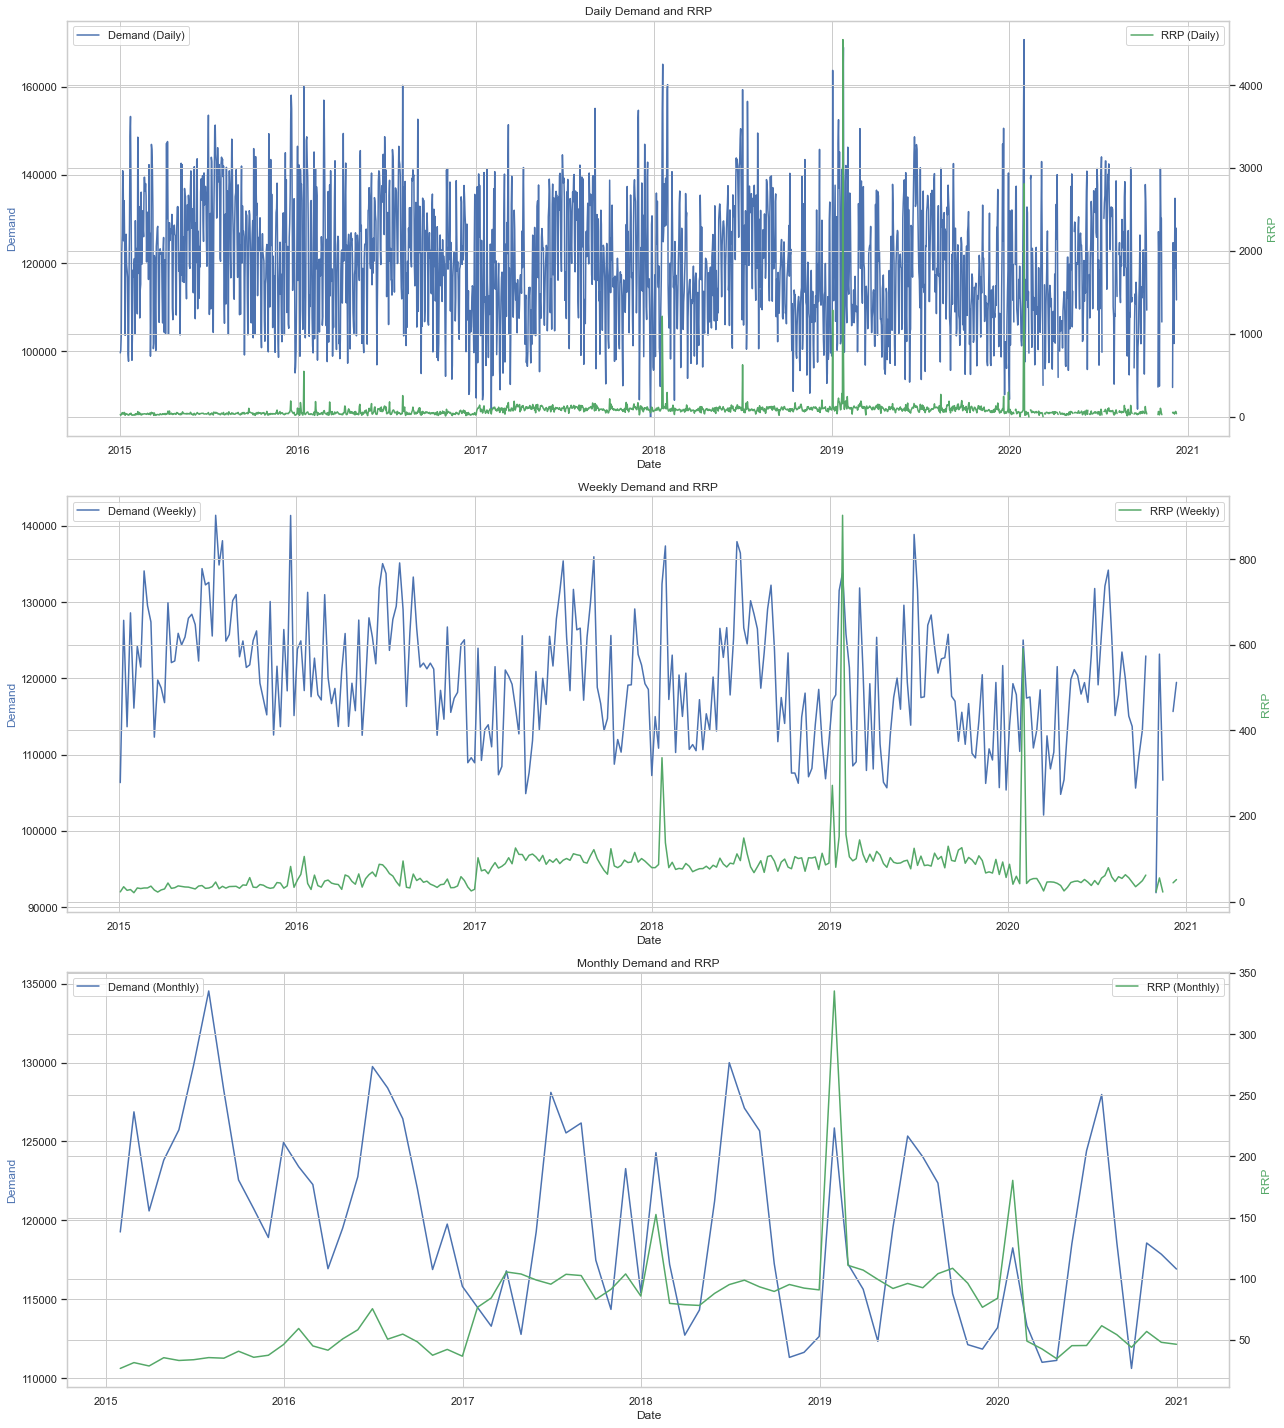

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

data1['date'] = pd.to_datetime(data1['date'])
data1.set_index('date', inplace=True)

data1['RRP'] = pd.to_numeric(data1['RRP'], errors='coerce')

daily = data1[['demand', 'RRP']].resample('D').mean()
weekly = data1[['demand', 'RRP']].resample('W').mean()
monthly = data1[['demand', 'RRP']].resample('M').mean()

plt.figure(figsize=(18, 20))


#Daily Plot
plt.subplot(3, 1, 1)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(daily.index, daily['demand'], label='Demand (Daily)', color='b')
ax2.plot(daily.index, daily['RRP'], label='RRP (Daily)', color='g')
ax1.set_title('Daily Demand and RRP')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand', color='b')
ax2.set_ylabel('RRP', color='g')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Weekly plot
plt.subplot(3, 1, 2)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(weekly.index, weekly['demand'], label='Demand (Weekly)', color='b')
ax2.plot(weekly.index, weekly['RRP'], label='RRP (Weekly)', color='g')
ax1.set_title('Weekly Demand and RRP')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand', color='b')
ax2.set_ylabel('RRP', color='g')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Monthly plot
plt.subplot(3, 1, 3)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(monthly.index, monthly['demand'], label='Demand (Monthly)', color='b')
ax2.plot(monthly.index, monthly['RRP'], label='RRP (Monthly)', color='g')
ax1.set_title('Monthly Demand and RRP')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand', color='b')
ax2.set_ylabel('RRP', color='g')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

plt.tight_layout()
plt.show()


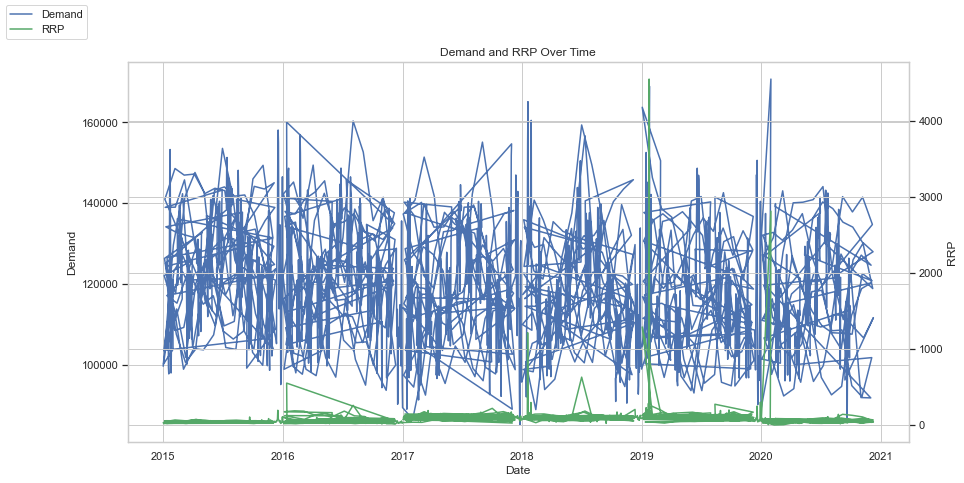

In [57]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(data1.index, data1['demand'], label='Demand', color='b')
ax2 = ax1.twinx()
ax2.plot(data1.index, data1['RRP'], label='RRP', color='g')

ax1.set_xlabel('Date')
ax1.set_ylabel('Demand')
ax2.set_ylabel('RRP')

fig.legend(loc='upper left')
plt.title('Demand and RRP Over Time')
plt.grid(True)
plt.show()


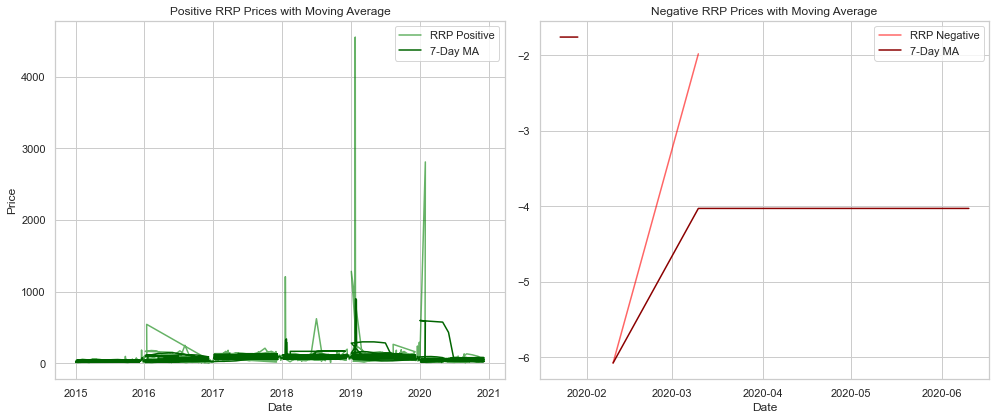

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

data1['date'] = pd.to_datetime(data1['date'])

data1['RRP_positive'] = data1['RRP'].apply(lambda x: x if x > 0 else None)
data1['RRP_negative'] = data1['RRP'].apply(lambda x: x if x < 0 else None)

data1['RRP_positive_MA'] = data1['RRP_positive'].rolling(window=7, min_periods=1).mean()
data1['RRP_negative_MA'] = data1['RRP_negative'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(14, 6))

# Positive Plot
plt.subplot(1, 2, 1)
plt.plot(data1['date'], data1['RRP_positive'], label='RRP Positive', color='green', alpha=0.6)
plt.plot(data1['date'], data1['RRP_positive_MA'], label='7-Day MA', color='darkgreen')
plt.title('Positive RRP Prices with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Negative Plot
plt.subplot(1, 2, 2)
plt.plot(data1['date'], data1['RRP_negative'], label='RRP Negative', color='red', alpha=0.6)
plt.plot(data1['date'], data1['RRP_negative_MA'], label='7-Day MA', color='darkred')
plt.title('Negative RRP Prices with Moving Average')
plt.xlabel('Date')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


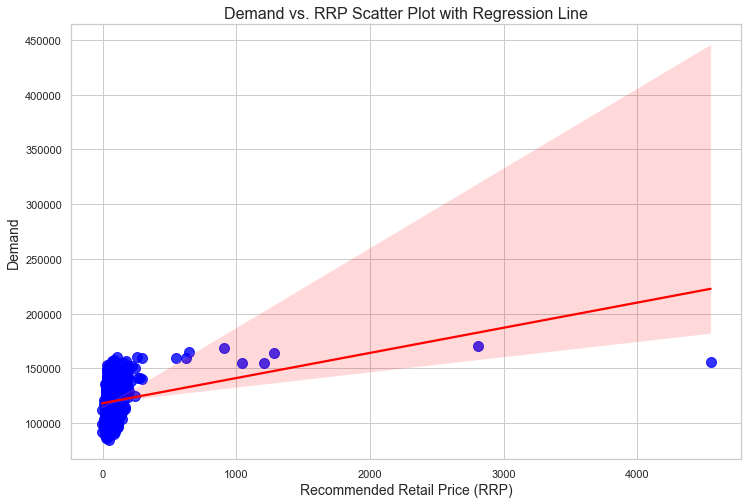

In [69]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.regplot(x='RRP', y='demand', data=data1, scatter_kws={'s': 100, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Demand vs. RRP Scatter Plot with Regression Line', fontsize=16)
plt.xlabel('Recommended Retail Price (RRP)', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.show()

# Weather Impact Analysis

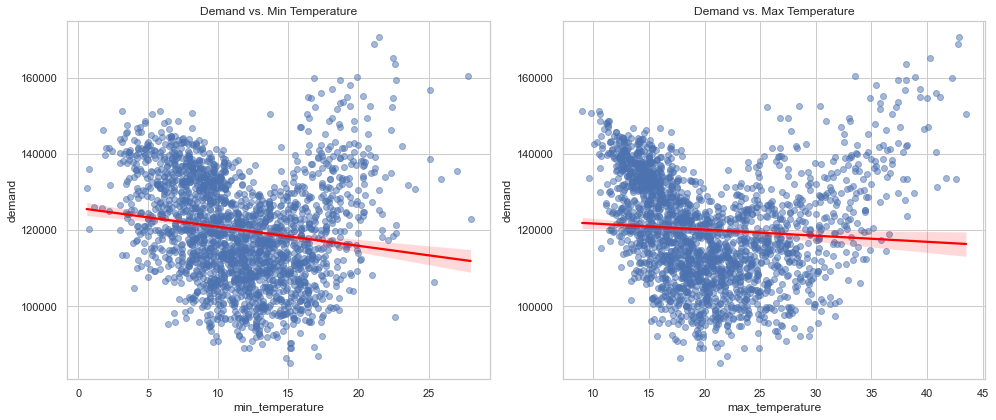

In [70]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x="min_temperature", y="demand", data=data1, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Demand vs. Min Temperature")

plt.subplot(1, 2, 2)
sns.regplot(x="max_temperature", y="demand", data=data1, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Demand vs. Max Temperature")

plt.tight_layout()
plt.show()

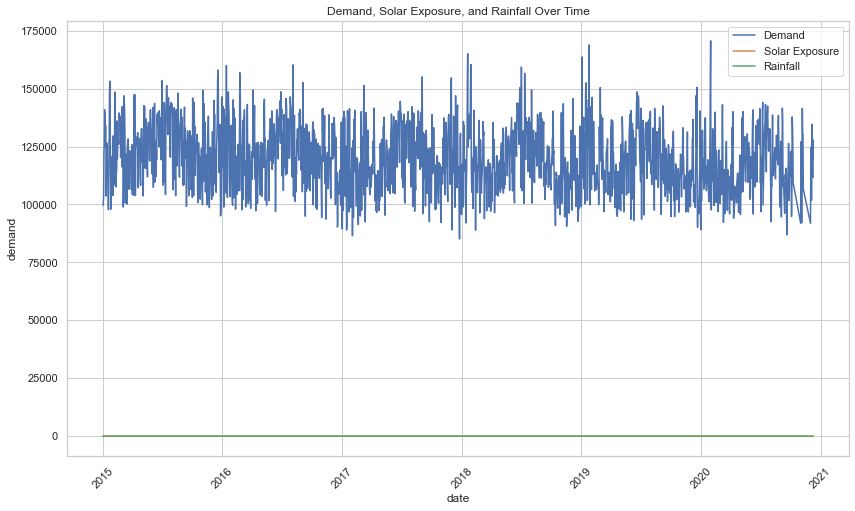

In [72]:
# Line plots for seasonal patterns
plt.figure(figsize=(14, 8))
sns.lineplot(x="date", y="demand", data=data1, label="Demand")
sns.lineplot(x="date", y="solar_exposure", data=data1, label="Solar Exposure")
sns.lineplot(x="date", y="rainfall", data=data1, label="Rainfall")
plt.xticks(rotation=45)
plt.title("Demand, Solar Exposure, and Rainfall Over Time")
plt.legend()
plt.show()

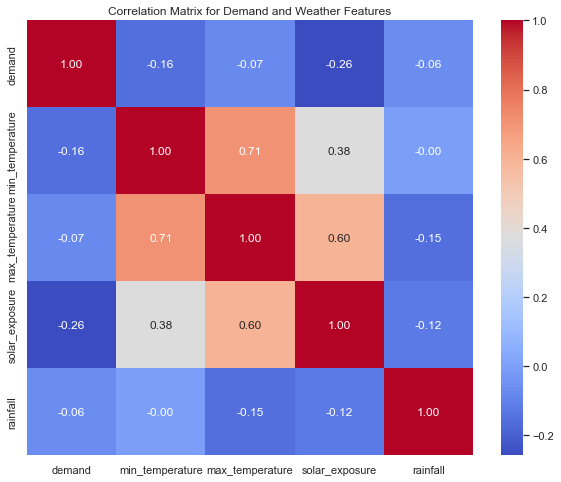

In [73]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data1[["demand", "min_temperature", "max_temperature", "solar_exposure", "rainfall"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Demand and Weather Features")
plt.show()

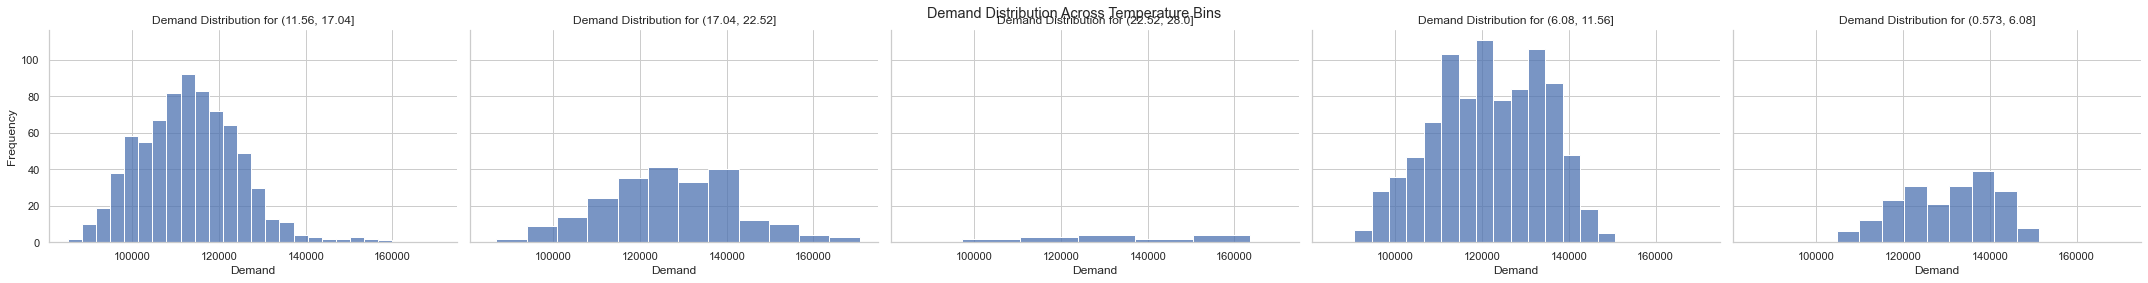

In [77]:
bins = pd.cut(data1["min_temperature"], bins=5)
data1["temp_bins"] = bins.astype(str)

g = sns.FacetGrid(data1, col="temp_bins", height=4, aspect=1.5)
g.map(sns.histplot, "demand")
g.set_titles("Demand Distribution for {col_name}")
g.set_axis_labels("Demand", "Frequency")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Demand Distribution Across Temperature Bins")
plt.show()


# Operational Efficiency & Special Event Analysis

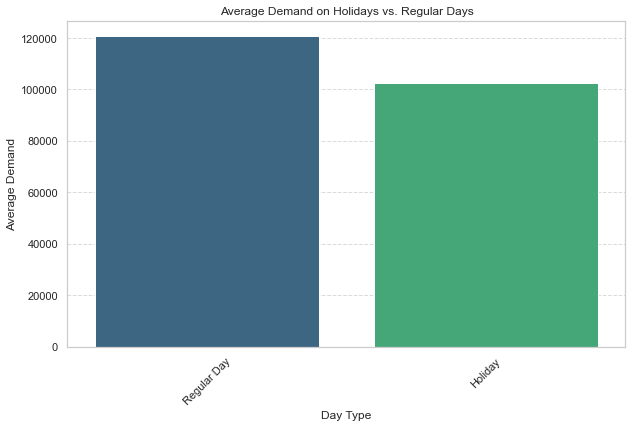

In [78]:
average_demand = data1.groupby('holiday')['demand'].mean().reset_index()
average_demand['holiday'] = average_demand['holiday'].map({1: 'Holiday', 0: 'Regular Day'})

plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='demand', data=average_demand, palette='viridis')

plt.title('Average Demand on Holidays vs. Regular Days')
plt.xlabel('Day Type')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


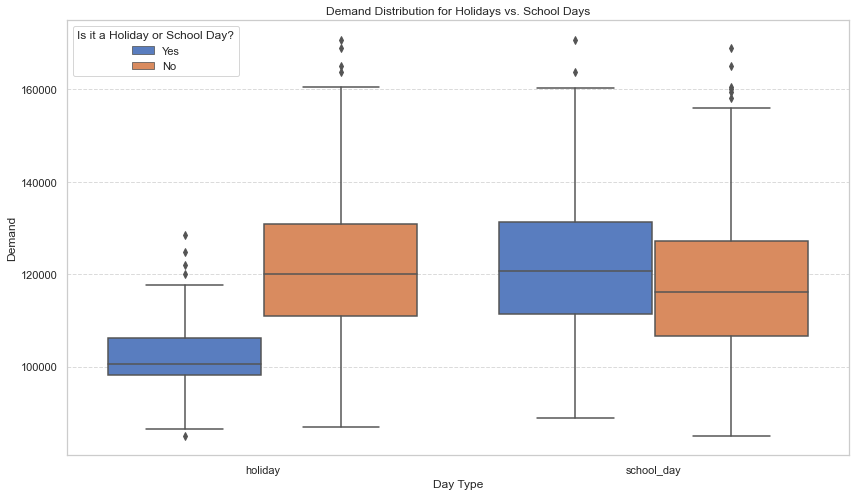

In [79]:
df_melted = pd.melt(data1, id_vars=['demand'], value_vars=['holiday', 'school_day'], 
                    var_name='Day Type', value_name='Indicator')
df_melted['Indicator'] = df_melted['Indicator'].map({1: 'Yes', 0: 'No'})
plt.figure(figsize=(14, 8))
sns.boxplot(x='Day Type', y='demand', hue='Indicator', data=df_melted, palette='muted')
plt.title('Demand Distribution for Holidays vs. School Days')
plt.xlabel('Day Type')
plt.ylabel('Demand')
plt.legend(title='Is it a Holiday or School Day?')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Anomaly Detection and Outlier Analysis

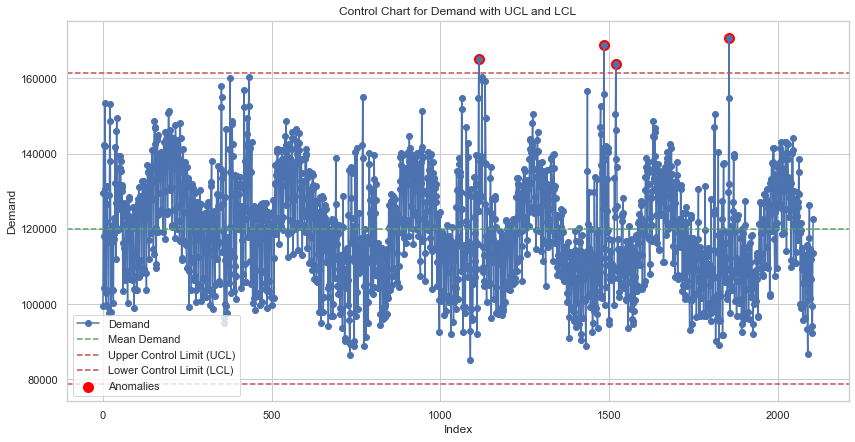

In [82]:

mean_demand = data1['demand'].mean()
std_demand = data1['demand'].std()

upper_control_limit = mean_demand + 3 * std_demand
lower_control_limit = mean_demand - 3 * std_demand

plt.figure(figsize=(14, 7))
plt.plot(data1['demand'], marker='o', label='Demand', color='b')
plt.axhline(mean_demand, color='g', linestyle='--', label='Mean Demand')
plt.axhline(upper_control_limit, color='r', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lower_control_limit, color='r', linestyle='--', label='Lower Control Limit (LCL)')

anomalies = data1[(data1['demand'] > upper_control_limit) | (data1['demand'] < lower_control_limit)]
plt.scatter(anomalies.index, anomalies['demand'], color='red', s=100, label='Anomalies')

plt.title('Control Chart for Demand with UCL and LCL')
plt.xlabel('Index')
plt.ylabel('Demand')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Revenue and Cost Optimization Opportunities

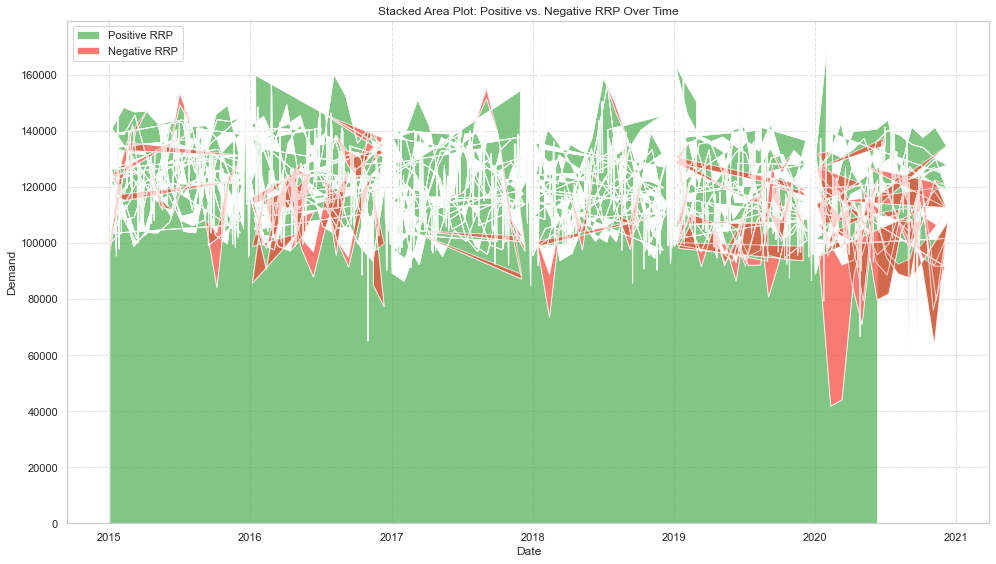

In [83]:

plt.figure(figsize=(14, 8))
plt.stackplot(data1['date'], data1['demand_pos_RRP'], data1['demand_neg_RRP'],
              labels=['Positive RRP', 'Negative RRP'], colors=['#4caf50', '#f44336'], alpha=0.7)

plt.title('Stacked Area Plot: Positive vs. Negative RRP Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Advanced Temporal Feature Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


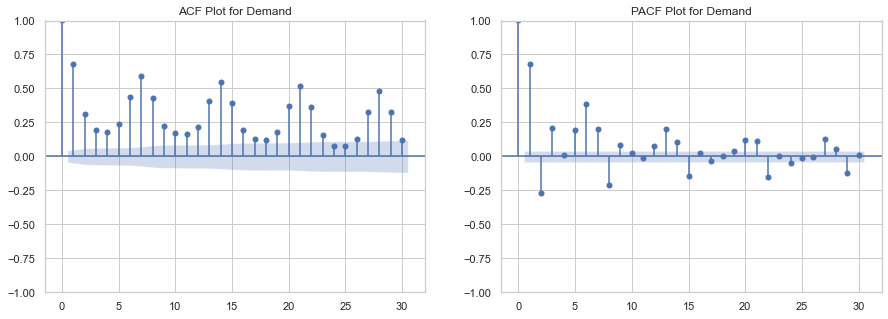

In [84]:
#Autocorrelation Plot

demand_series = data1['demand']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sm.graphics.tsa.plot_acf(demand_series, lags=30, ax=axes[0], title="ACF Plot for Demand")
sm.graphics.tsa.plot_pacf(demand_series, lags=30, ax=axes[1], title="PACF Plot for Demand")
plt.show()


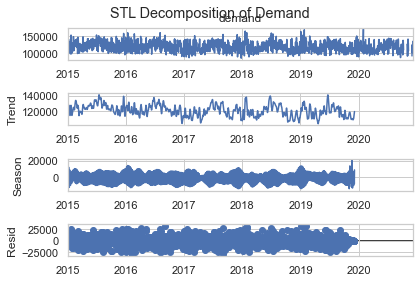

In [88]:
#Seasonal Decomposition Plot
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

data1['date'] = pd.to_datetime(data1['date'])
data1.set_index('date', inplace=True)
data1 = data1.asfreq('D')  # Assuming daily frequency

stl = STL(data1['demand'], period=7, seasonal=13)  
result = stl.fit()

result.plot()
plt.suptitle('STL Decomposition of Demand')
plt.show()



# Forecasting Readiness and Feature Engineering

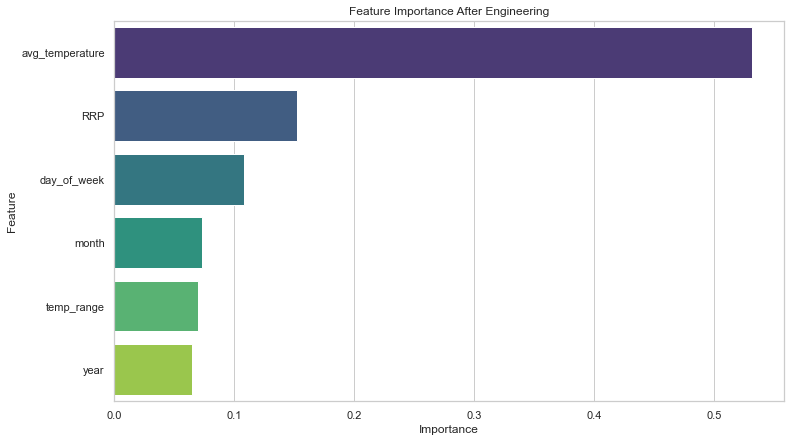

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


data1['year'] = pd.to_datetime(data1['date']).dt.year
data1['month'] = pd.to_datetime(data1['date']).dt.month
data1['day_of_week'] = pd.to_datetime(data1['date']).dt.dayofweek
data1['temp_range'] = data1['max_temperature'] - data1['min_temperature']
data1['avg_temperature'] = (data1['max_temperature'] + data1['min_temperature']) / 2

X = data1[['year', 'month', 'day_of_week', 'RRP', 'temp_range', 'avg_temperature']]
y = data1['demand']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Feature Importance After Engineering')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


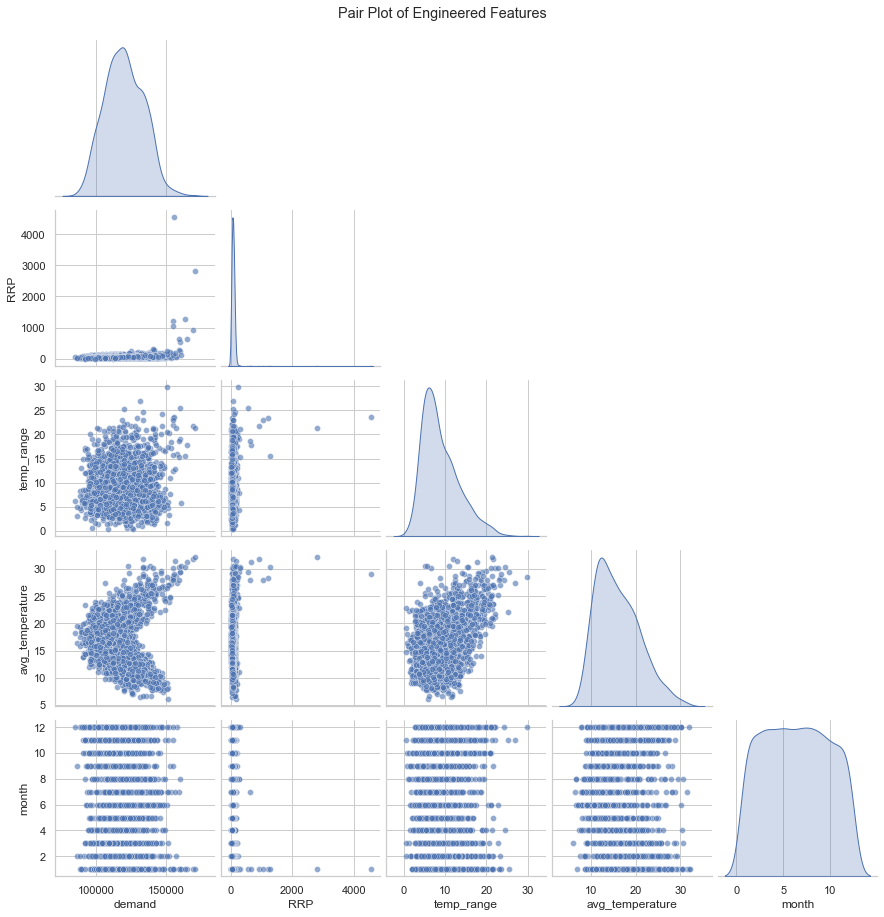

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


data1['year'] = pd.to_datetime(data1['date']).dt.year
data1['month'] = pd.to_datetime(data1['date']).dt.month
data1['day_of_week'] = pd.to_datetime(data1['date']).dt.dayofweek
data1['temp_range'] = data1['max_temperature'] - data1['min_temperature']
data1['avg_temperature'] = (data1['max_temperature'] + data1['min_temperature']) / 2

pairplot_features = ['demand', 'RRP', 'temp_range', 'avg_temperature', 'month']
sns.pairplot(data1[pairplot_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Engineered Features', y=1.02)
plt.show()
